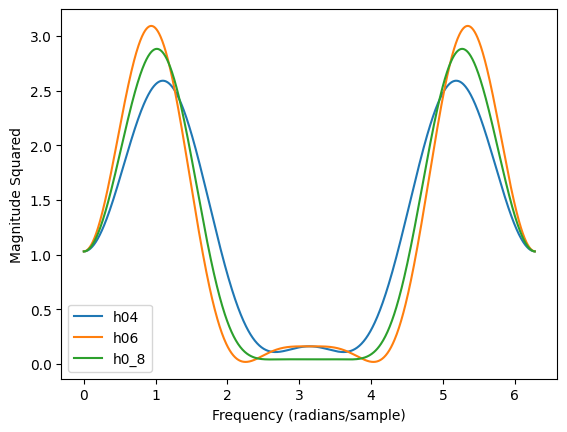

Sum for h0_4: 2.5270128400000003
Sum for h0_6: 2.45672422
Sum for h0_8: 2.4355088400000002


In [105]:
import numpy as np
import matplotlib.pyplot as plt


h04 = np.array([-0.5294, 0.2241, 0.8365, 0.4830])
h06 = np.array([0.0352, -0.4854, -0.1350, 0.4599, 0.8069, 0.3327])
h0_8 = np.array([-0.0106, 0.0329, 0.0308, -0.4870, -0.1280, 0.6309, 0.7148, 0.2304])

N = 1024 
H04 = np.abs(np.fft.fft(h04, N))**2
H06 = np.abs(np.fft.fft(h06, N))**2
H0_8 = np.abs(np.fft.fft(h0_8, N))**2

w = np.arange(N)/N*2*np.pi
plt.plot(w, H04, label='h04')
plt.plot(w, H06, label='h06')
plt.plot(w, H0_8, label='h0_8')
plt.xlabel('Frequency (radians/sample)')
plt.ylabel('Magnitude Squared')
plt.legend()
plt.show()

sum_h0_4 = np.abs(np.fft.fft(h04, 1024))**2 + np.abs(np.fft.fft(h04 * np.exp(1j*np.pi), 1024))**2
sum_h0_6 = np.abs(np.fft.fft(h06, 1024))**2 + np.abs(np.fft.fft(h06 * np.exp(1j*np.pi), 1024))**2
sum_h0_8 = np.abs(np.fft.fft(h0_8, 1024))**2 + np.abs(np.fft.fft(h0_8 * np.exp(1j*np.pi), 1024))**2

print(f'Sum for h0_4: {np.mean(sum_h0_4)}')
print(f'Sum for h0_6: {np.mean(sum_h0_6)}')
print(f'Sum for h0_8: {np.mean(sum_h0_8)}')


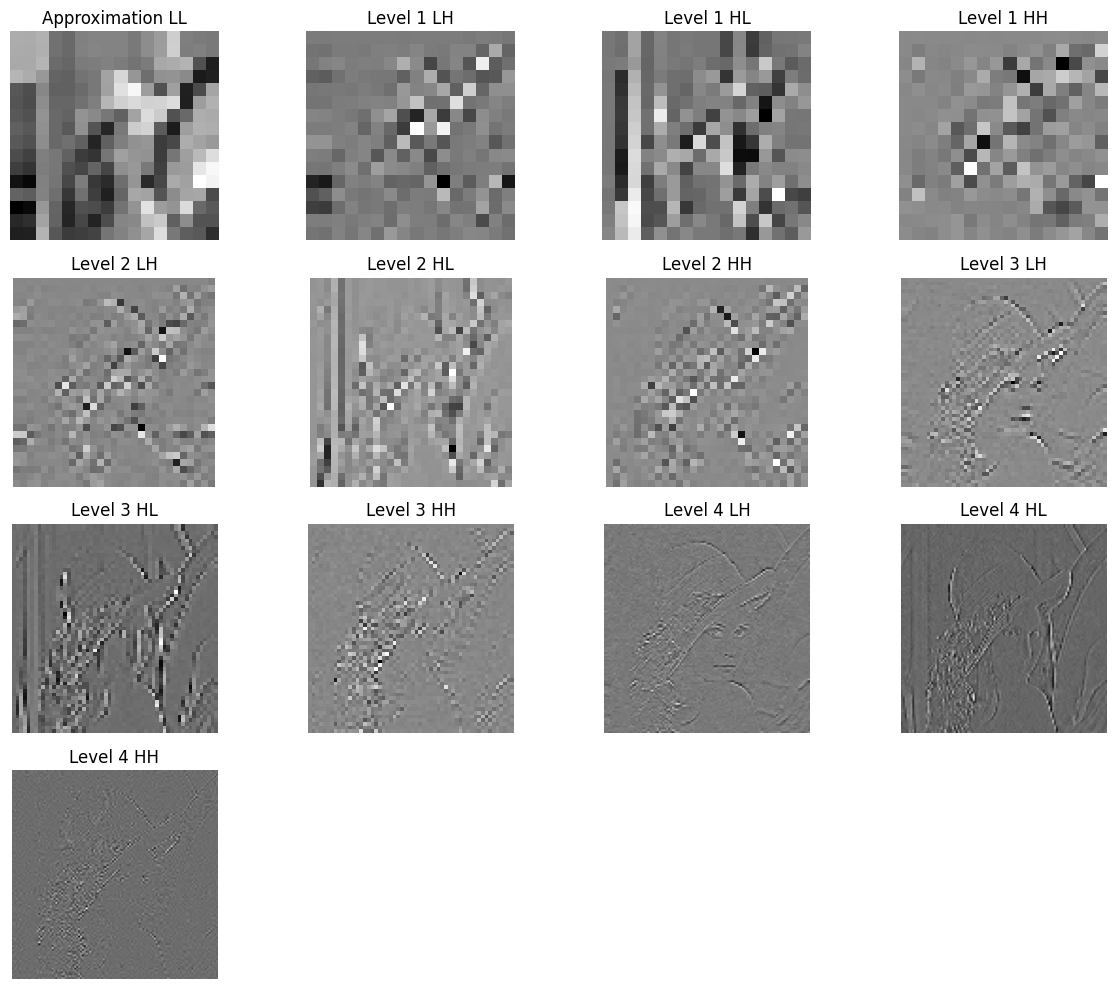

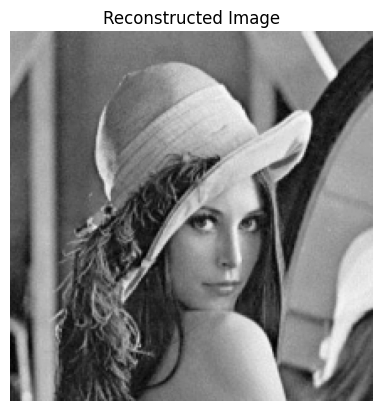

Peak Signal to Noise Ratio (PSNR): 308.092857900231


In [106]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

image_path = "lenna.png"
image = Image.open(image_path).convert("L")
pixels = np.array(image)

h0 = [-0.1294, 0.2241, 0.8365, 0.4830]

coeffs = pywt.wavedec2(pixels, wavelet='db2', level=4)

approx_coeffs = [coeffs[0]]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail[0] ** 2) + np.sum(detail[1] ** 2) + np.sum(detail[2] ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs[0]] + [detail_coeffs[i] for i in sorted_indices[:4]]

reconstructed_image = pywt.waverec2(selected_subbands, wavelet='db2')

mse = np.mean((pixels - reconstructed_image) ** 2)
max_pixel_value = 255
psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.imshow(approx_coeffs[0], cmap='gray')
plt.title("Approximation LL")
plt.axis('off')

subband_count = 1
for i, detail_coeff in enumerate(detail_coeffs):
    level = i + 1
    h, v, d = detail_coeff

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(h, cmap='gray')
    plt.title(f"Level {level} LH")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(v, cmap='gray')
    plt.title(f"Level {level} HL")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(d, cmap='gray')
    plt.title(f"Level {level} HH")
    plt.axis('off')
    subband_count += 1

    if subband_count >= 13:
        break

plt.tight_layout()
plt.show()

# Display the reconstructed image
plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

print("Peak Signal to Noise Ratio (PSNR):", psnr)






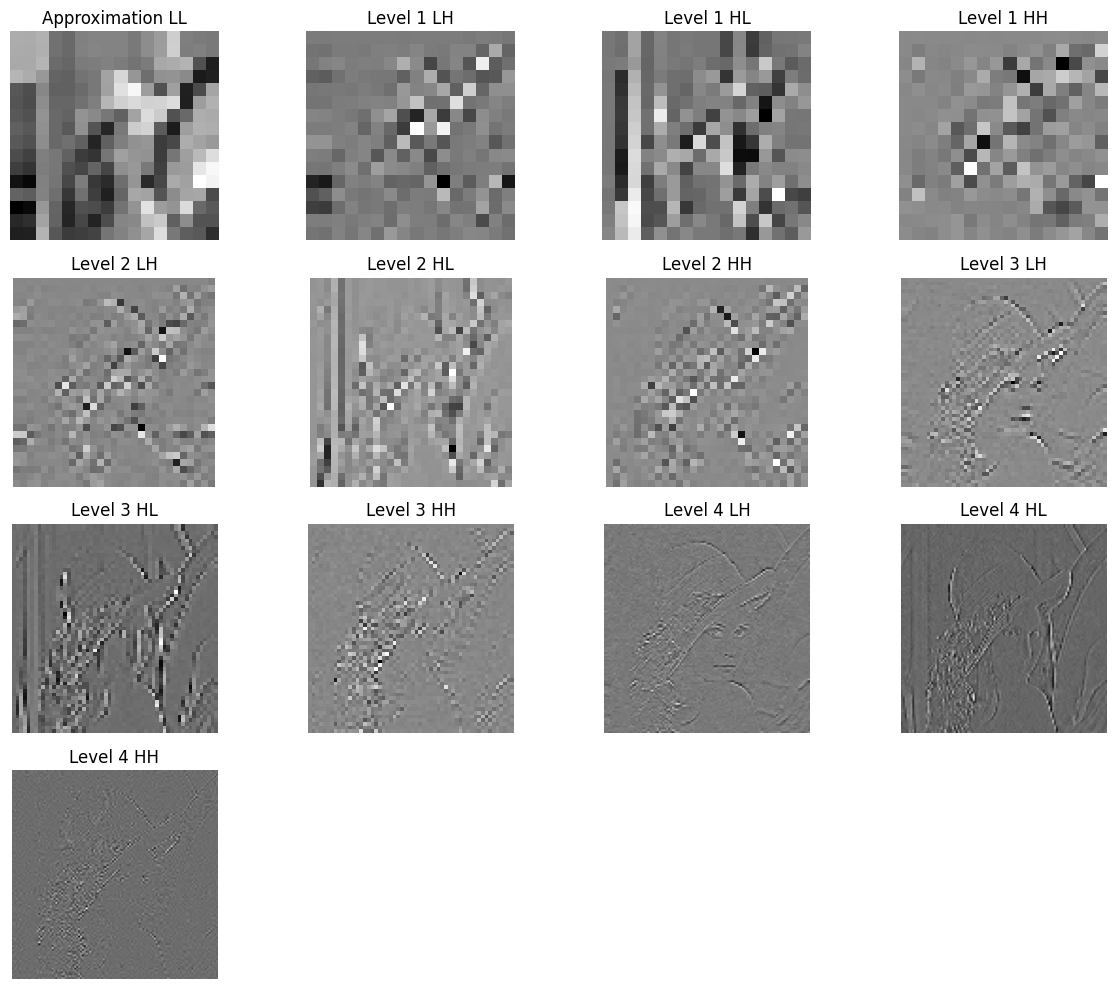

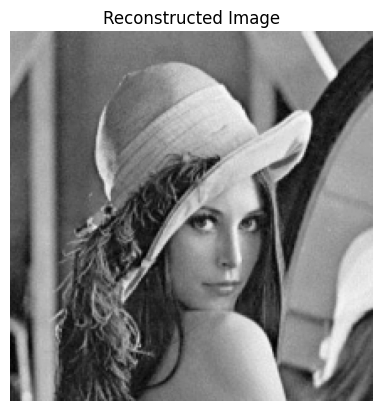

Peak Signal to Noise Ratio (PSNR): 308.092857900231


In [107]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

image_path = "lenna.png"
image = Image.open(image_path).convert("L")
pixels = np.array(image)

h0 = [0.0352, -0.0854, -0.1350, 0.4599, 0.8069, 0.3327]

coeffs = pywt.wavedec2(pixels, wavelet='db2', level=4)

approx_coeffs = [coeffs[0]]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail[0] ** 2) + np.sum(detail[1] ** 2) + np.sum(detail[2] ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs[0]] + [detail_coeffs[i] for i in sorted_indices[:4]]

reconstructed_image = pywt.waverec2(selected_subbands, wavelet='db2')

mse = np.mean((pixels - reconstructed_image) ** 2)
max_pixel_value = 255
psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.imshow(approx_coeffs[0], cmap='gray')
plt.title("Approximation LL")
plt.axis('off')

subband_count = 1
for i, detail_coeff in enumerate(detail_coeffs):
    level = i + 1
    h, v, d = detail_coeff

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(h, cmap='gray')
    plt.title(f"Level {level} LH")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(v, cmap='gray')
    plt.title(f"Level {level} HL")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(d, cmap='gray')
    plt.title(f"Level {level} HH")
    plt.axis('off')
    subband_count += 1

    if subband_count >= 13:
        break

plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

print("Peak Signal to Noise Ratio (PSNR):", psnr)


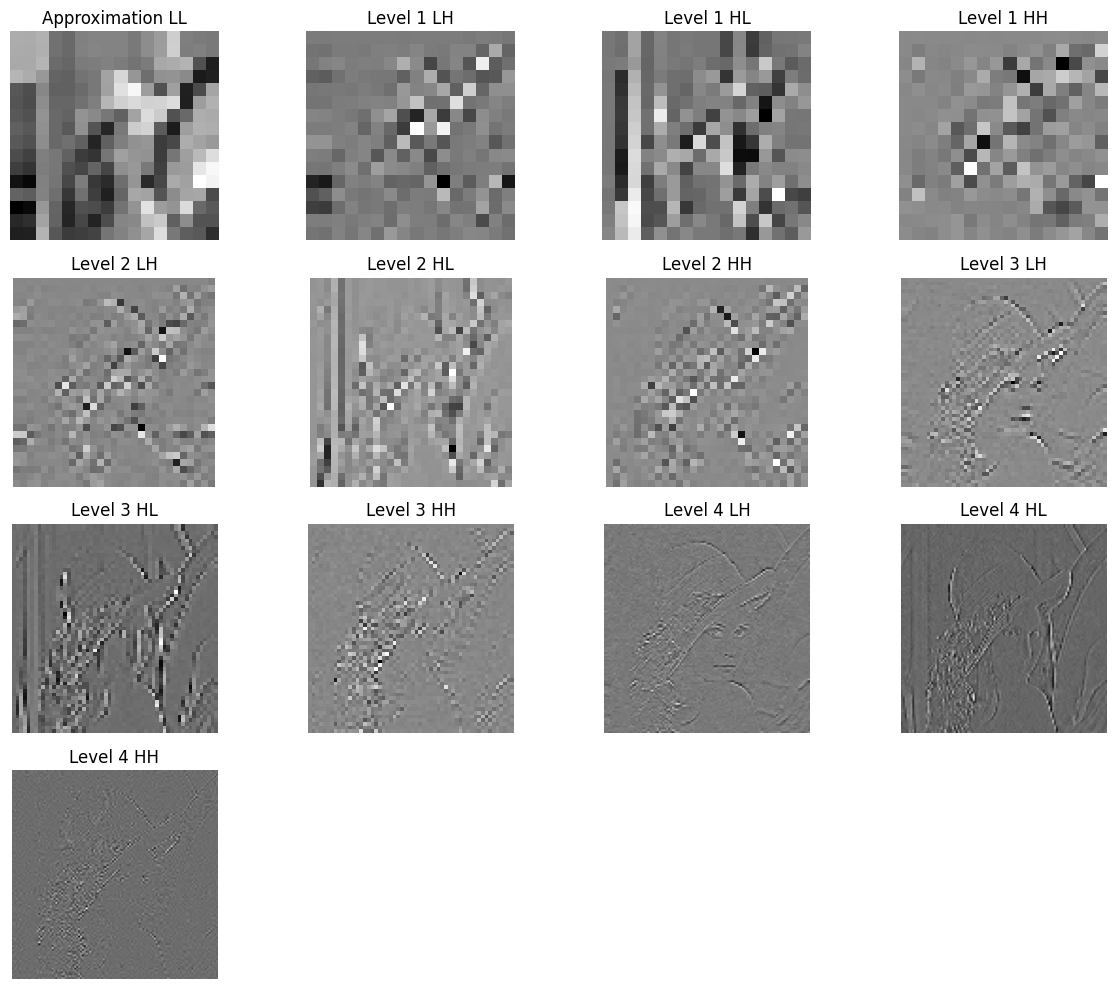

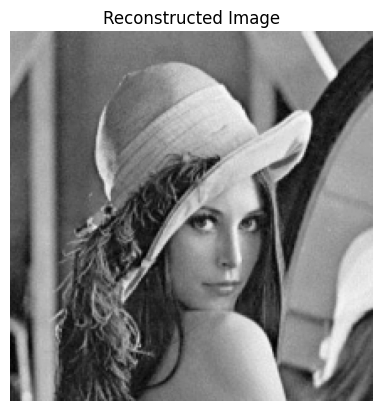

Peak Signal to Noise Ratio (PSNR): 308.092857900231


In [108]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from PIL import Image

image_path = "lenna.png"
image = Image.open(image_path).convert("L")
pixels = np.array(image)

h0 = [-0.0106, 0.0329, 0.0308, -0.1870, -0.0280, 0.6309, 0.7148, 0.2304]

coeffs = pywt.wavedec2(pixels, wavelet='db2', level=4)

approx_coeffs = [coeffs[0]]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail[0] ** 2) + np.sum(detail[1] ** 2) + np.sum(detail[2] ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs[0]] + [detail_coeffs[i] for i in sorted_indices[:4]]

reconstructed_image = pywt.waverec2(selected_subbands, wavelet='db2')

mse = np.mean((pixels - reconstructed_image) ** 2)
max_pixel_value = 255
psnr = 10 * np.log10((max_pixel_value ** 2) / mse)

plt.figure(figsize=(12, 10))
plt.subplot(4, 4, 1)
plt.imshow(approx_coeffs[0], cmap='gray')
plt.title("Approximation LL")
plt.axis('off')

subband_count = 1
for i, detail_coeff in enumerate(detail_coeffs):
    level = i + 1
    h, v, d = detail_coeff

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(h, cmap='gray')
    plt.title(f"Level {level} LH")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(v, cmap='gray')
    plt.title(f"Level {level} HL")
    plt.axis('off')
    subband_count += 1

    plt.subplot(4, 4, subband_count + 1)
    plt.imshow(d, cmap='gray')
    plt.title(f"Level {level} HH")
    plt.axis('off')
    subband_count += 1

    if subband_count >= 13:
        break

plt.tight_layout()
plt.show()

plt.figure()
plt.imshow(reconstructed_image, cmap='gray')
plt.title("Reconstructed Image")
plt.axis('off')
plt.show()

print("Peak Signal to Noise Ratio (PSNR):", psnr)



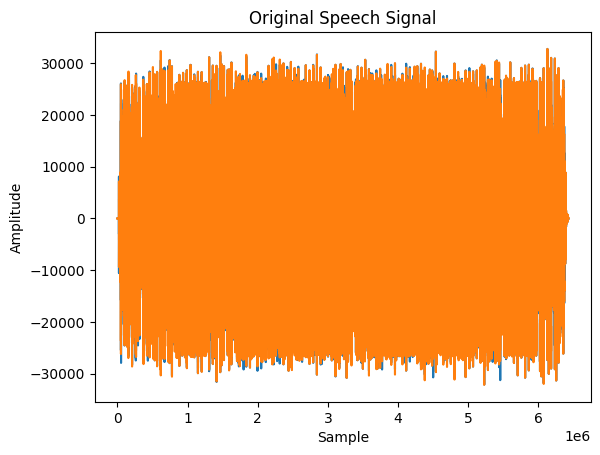

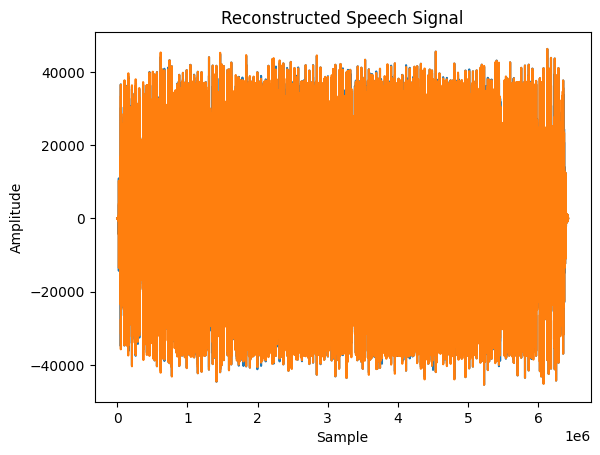

Compression Ratio: 0.0625
Peak Signal to Noise Ratio (PSNR): 20.805235190462838


In [109]:
import numpy as np
import pywt
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

fs, speech_signal = wavfile.read("ses 1.wav")

h0 = [0.0352, -0.0854, -0.1350, 0.4599, 0.8069, 0.3327]

coeffs = pywt.wavedec(speech_signal, wavelet='db2', level=4)

approx_coeffs = coeffs[0]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs] + [detail_coeffs[i] for i in sorted_indices[:3]]

reconstructed_signal = pywt.waverec(selected_subbands, wavelet='db2')

original_size = speech_signal.nbytes
compressed_size = sum(detail.nbytes for detail in selected_subbands)
compression_ratio = original_size / compressed_size

mse = np.mean((speech_signal - reconstructed_signal) ** 2)
max_sample_value = np.max(speech_signal)
psnr = 10 * np.log10((max_sample_value ** 2) / mse)

plt.figure()
plt.plot(speech_signal)
plt.title("Original Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

plt.figure()
plt.plot(reconstructed_signal)
plt.title("Reconstructed Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

print("Compression Ratio:", compression_ratio)
print("Peak Signal to Noise Ratio (PSNR):", psnr)


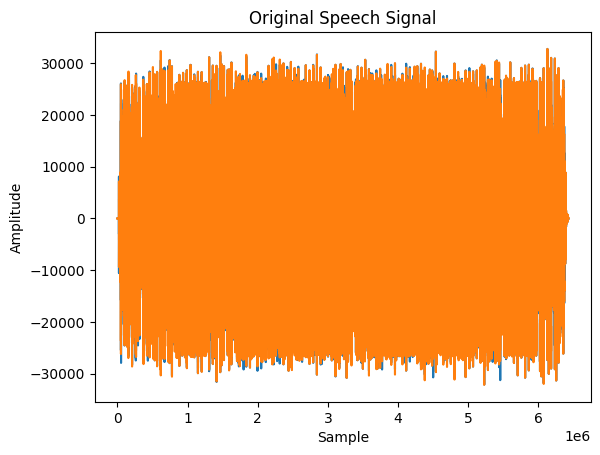

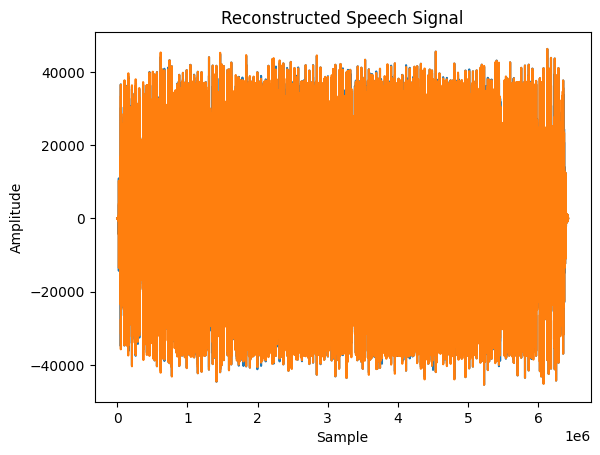

Compression Ratio: 0.0625
Peak Signal to Noise Ratio (PSNR): 20.805235190462838


In [110]:
import numpy as np
import pywt
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

fs, speech_signal = wavfile.read("ses 1.wav")

h0 = [-0.1294, 0.2241, 0.8365, 0.4830]

coeffs = pywt.wavedec(speech_signal, wavelet='db2', level=4)

approx_coeffs = coeffs[0]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs] + [detail_coeffs[i] for i in sorted_indices[:3]]

reconstructed_signal = pywt.waverec(selected_subbands, wavelet='db2')

original_size = speech_signal.nbytes
compressed_size = sum(detail.nbytes for detail in selected_subbands)
compression_ratio = original_size / compressed_size

mse = np.mean((speech_signal - reconstructed_signal) ** 2)
max_sample_value = np.max(speech_signal)
psnr = 10 * np.log10((max_sample_value ** 2) / mse)

plt.figure()
plt.plot(speech_signal)
plt.title("Original Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

plt.figure()
plt.plot(reconstructed_signal)
plt.title("Reconstructed Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

print("Compression Ratio:", compression_ratio)
print("Peak Signal to Noise Ratio (PSNR):", psnr)


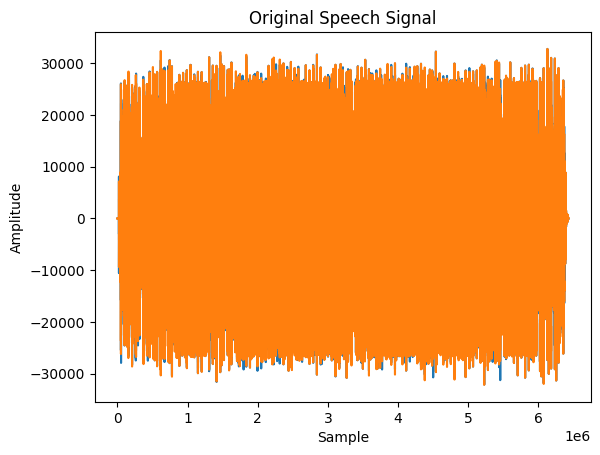

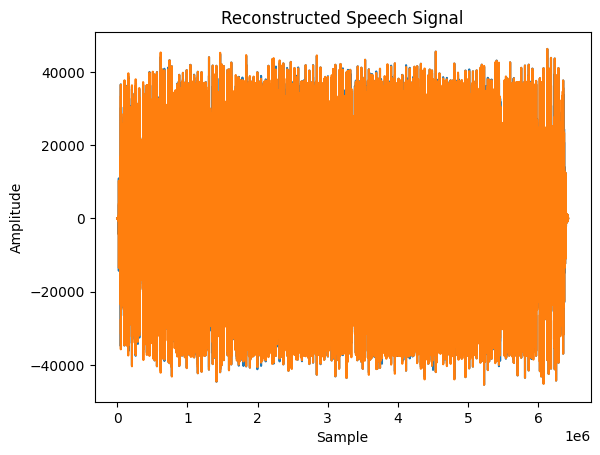

Compression Ratio: 0.0625
Peak Signal to Noise Ratio (PSNR): 20.805235190462838


In [111]:
import numpy as np
import pywt
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

fs, speech_signal = wavfile.read("ses 1.wav")

h0 = [-0.0106, 0.0329, 0.0308, -0.1870, -0.0280, 0.6309, 0.7148, 0.2304]

coeffs = pywt.wavedec(speech_signal, wavelet='db2', level=4)

approx_coeffs = coeffs[0]
detail_coeffs = coeffs[1:]

energies = [np.sum(detail ** 2) for detail in detail_coeffs]

sorted_indices = np.argsort(energies)[::-1]
selected_subbands = [approx_coeffs] + [detail_coeffs[i] for i in sorted_indices[:3]]

reconstructed_signal = pywt.waverec(selected_subbands, wavelet='db2')

original_size = speech_signal.nbytes
compressed_size = sum(detail.nbytes for detail in selected_subbands)
compression_ratio = original_size / compressed_size

mse = np.mean((speech_signal - reconstructed_signal) ** 2)
max_sample_value = np.max(speech_signal)
psnr = 10 * np.log10((max_sample_value ** 2) / mse)

plt.figure()
plt.plot(speech_signal)
plt.title("Original Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

plt.figure()
plt.plot(reconstructed_signal)
plt.title("Reconstructed Speech Signal")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.show()

print("Compression Ratio:", compression_ratio)
print("Peak Signal to Noise Ratio (PSNR):", psnr)


